<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.646100,41.272994,23.528825,45.260231,-27.099699,175.608450,200.462322,-24.853872
1,0.0,1.0,61.390523,93.656793,93.356551,51.461138,120.982830,430.847836,333.478879,97.368957
2,0.0,2.0,84.408356,28.506811,30.938553,30.321284,-23.372032,160.802971,203.647936,-42.844965
3,0.0,3.0,78.483465,59.065299,95.878804,92.895843,-5.469349,330.854062,360.214262,-29.360200
4,0.0,4.0,89.101143,40.132533,43.431715,23.160956,55.135658,260.962005,235.428873,25.533132
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.375386,67.433045,83.791863,77.804877,-154.958052,157.447119,320.033732,-162.586613
59996,999.0,56.0,59.436122,85.461651,63.137953,69.644585,127.155883,414.836193,285.975315,128.860878
59997,999.0,57.0,32.056041,59.371953,56.709558,36.256703,-39.121524,155.272732,200.196838,-44.924105
59998,999.0,58.0,29.279691,57.466650,94.037743,68.078973,58.425687,317.288745,271.681845,45.606899


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.646100  41.272994  23.528825  45.260231  -27.099699   
      1.0    61.390523  93.656793  93.356551  51.461138  120.982830   
      2.0    84.408356  28.506811  30.938553  30.321284  -23.372032   
      3.0    78.483465  59.065299  95.878804  92.895843   -5.469349   
      4.0    89.101143  40.132533  43.431715  23.160956   55.135658   
...                ...        ...        ...        ...         ...   
999.0 55.0   73.375386  67.433045  83.791863  77.804877 -154.958052   
      56.0   59.436122  85.461651  63.137953  69.644585  127.155883   
      57.0   32.056041  59.371953  56.709558  36.256703  -39.121524   
      58.0   29.279691  57.466650  94.037743  68.078973   58.425687   
      59.0   81.773907  94.751487  67.520069  56.089868  -88.684235   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    175.608450  200.462322  -24.853872  
      1.0    430.847836  333.478879   97.368957  
      2.0    160.802971  203.647936  -42.844965  
      3.0    330.854062  360.214262  -29.360200  
      4.0    260.962005  235.428873   25.533132  
...                 ...         ...         ...  
999.0 55.0   157.447119  320.033732 -162.586613  
      56.0   414.836193  285.975315  128.860878  
      57.0   155.272732  200.196838  -44.924105  
      58.0   317.288745  271.681845   45.606899  
      59.0   221.451096  322.128490 -100.677395  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.646100  41.272994  23.528825  45.260231  -27.099699   
      1.0    61.390523  93.656793  93.356551  51.461138  120.982830   
      2.0    84.408356  28.506811  30.938553  30.321284  -23.372032   
      3.0    78.483465  59.065299  95.878804  92.895843   -5.469349   
      4.0    89.101143  40.132533  43.431715  23.160956   55.135658   
...                ...        ...        ...        ...         ...   
999.0 55.0   73.375386  67.433045  83.791863  77.804877 -154.958052   
      56.0   59.436122  85.461651  63.137953  69.644585  127.155883   
      57.0   32.056041  59.371953  56.709558  36.256703  -39.121524   
      58.0   29.279691  57.466650  94.037743  68.078973   58.425687   
      59.0   81.773907  94.751487  67.520069  56.089868  -88.684235   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    175.608450  200.462322  -24.853872  
      1.0    430.847836  333.478879   97.368957  
      2.0    160.802971  203.647936  -42.844965  
      3.0    330.854062  360.214262  -29.360200  
      4.0    260.962005  235.428873   25.533132  
...                 ...         ...         ...  
999.0 55.0   157.447119  320.033732 -162.586613  
      56.0   414.836193  285.975315  128.860878  
      57.0   155.272732  200.196838  -44.924105  
      58.0   317.288745  271.681845   45.606899  
      59.0   221.451096  322.128490 -100.677395  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,82.646100,41.272994,23.528825,45.260231,-27.099699,175.608450,200.462322,-24.853872
1,0.0,1.0,61.390523,93.656793,93.356551,51.461138,120.982830,430.847836,333.478879,97.368957
2,0.0,2.0,84.408356,28.506811,30.938553,30.321284,-23.372032,160.802971,203.647936,-42.844965
3,0.0,3.0,78.483465,59.065299,95.878804,92.895843,-5.469349,330.854062,360.214262,-29.360200
4,0.0,4.0,89.101143,40.132533,43.431715,23.160956,55.135658,260.962005,235.428873,25.533132
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,73.375386,67.433045,83.791863,77.804877,-154.958052,157.447119,320.033732,-162.586613
59996,999.0,56.0,59.436122,85.461651,63.137953,69.644585,127.155883,414.836193,285.975315,128.860878
59997,999.0,57.0,32.056041,59.371953,56.709558,36.256703,-39.121524,155.272732,200.196838,-44.924105
59998,999.0,58.0,29.279691,57.466650,94.037743,68.078973,58.425687,317.288745,271.681845,45.606899


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    82.646100  41.272994  23.528825  45.260231  -27.099699   
      1.0    61.390523  93.656793  93.356551  51.461138  120.982830   
      2.0    84.408356  28.506811  30.938553  30.321284  -23.372032   
      3.0    78.483465  59.065299  95.878804  92.895843   -5.469349   
      4.0    89.101143  40.132533  43.431715  23.160956   55.135658   
...                ...        ...        ...        ...         ...   
999.0 55.0   73.375386  67.433045  83.791863  77.804877 -154.958052   
      56.0   59.436122  85.461651  63.137953  69.644585  127.155883   
      57.0   32.056041  59.371953  56.709558  36.256703  -39.121524   
      58.0   29.279691  57.466650  94.037743  68.078973   58.425687   
      59.0   81.773907  94.751487  67.520069  56.089868  -88.684235   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    175.608450  200.462322  -24.853872  
      1.0    430.847836  333.478879   97.368957  
      2.0    160.802971  203.647936  -42.844965  
      3.0    330.854062  360.214262  -29.360200  
      4.0    260.962005  235.428873   25.533132  
...                 ...         ...         ...  
999.0 55.0   157.447119  320.033732 -162.586613  
      56.0   414.836193  285.975315  128.860878  
      57.0   155.272732  200.196838  -44.924105  
      58.0   317.288745  271.681845   45.606899  
      59.0   221.451096  322.128490 -100.677395  

[60000 rows x 8 columns]

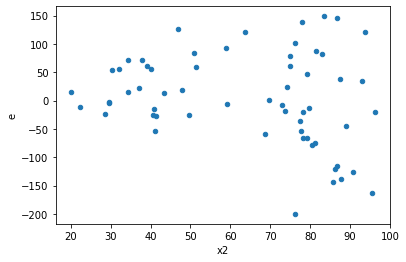

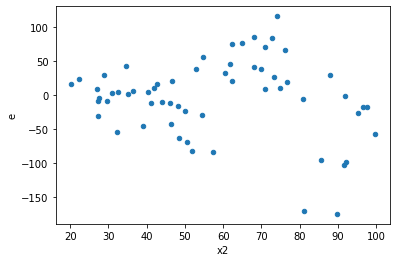

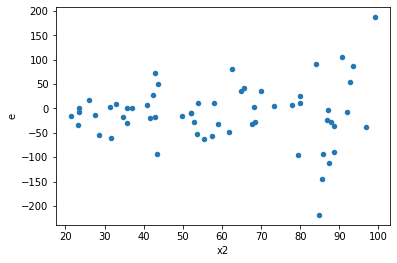

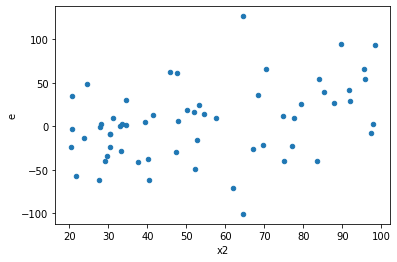

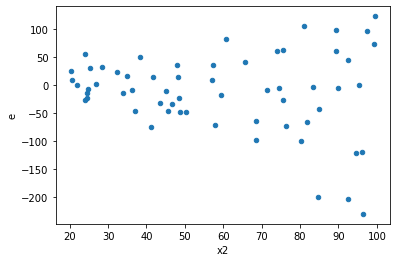

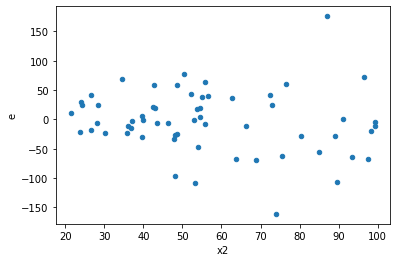

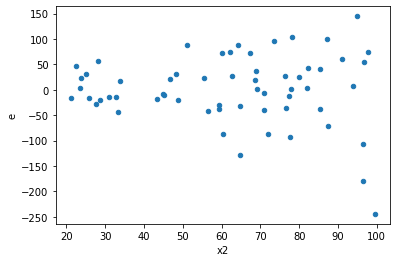

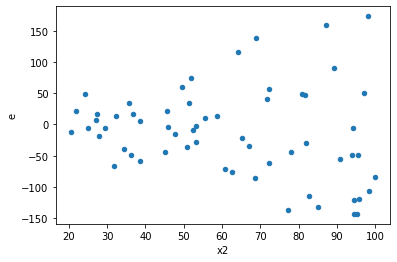

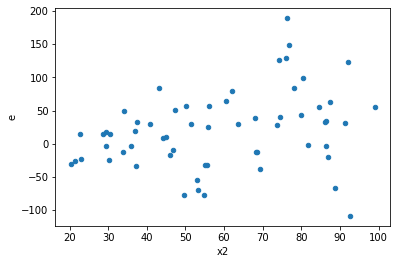

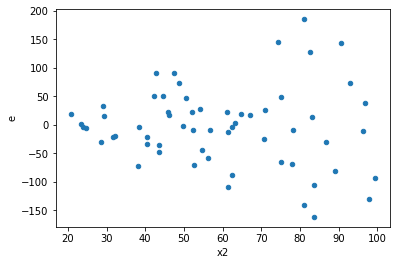

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,29.0,23.0,167819.14148880952,136219.45252344134,5786.866947889984,5922.584892323537,1.0234527501073856,0.965824936804943,0.5170875315975285,0.4829124684024715,Reject001=1 : Homoscedasticity
2.0,30.0,22.0,89720.53332338559,83692.02077688868,2990.6844441128533,3804.182762585849,1.2720107499386513,0.5649999207013681,0.717500039649316,0.28249996035068403,Reject001=1 : Homoscedasticity
5.0,30.0,22.0,65288.86211176163,82019.04736450194,2176.2954037253876,3728.13851656827,1.713066392635133,0.19465987058985457,0.9026700647050727,0.09732993529492728,Reject001=1 : Homoscedasticity
6.0,23.0,29.0,45196.317206652646,179542.61341413666,1965.057269854463,6191.124600487471,3.1506077178839687,0.003974228135174229,0.9980128859324129,0.0019871140675871146,Reject001=0 : Heteroscedasticity
11.0,29.0,23.0,73220.18799565281,80522.6274185863,2524.834068815614,3500.9838008081,1.386619360079529,0.4250320533159373,0.7874839733420314,0.21251602665796865,Reject001=1 : Homoscedasticity
13.0,30.0,22.0,95100.05111541376,124478.39617559724,3170.0017038471256,5658.108917072602,1.7848914434985634,0.16308446901154183,0.9184577654942291,0.08154223450577092,Reject001=1 : Homoscedasticity
14.0,28.0,24.0,34902.9817286944,173160.68533613515,1246.5350617390857,7215.028555672298,5.788067080605301,4.283302532059885e-05,0.9999785834873397,2.1416512660299425e-05,Reject001=0 : Heteroscedasticity
19.0,22.0,30.0,48132.75972971392,136467.42250197526,2187.8527149869965,4548.914083399175,2.079168333516551,0.06276873330500687,0.9686156333474966,0.03138436665250344,Reject001=1 : Homoscedasticity
21.0,29.0,23.0,66721.96268966702,138428.2662611259,2300.757334126449,6018.6202722228645,2.6159300604850673,0.020744070940537318,0.9896279645297313,0.010372035470268659,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,23.0,167819.14148880952,136219.45252344134,5786.866947889984,5922.584892323537,1.0234527501073856,0.965824936804943,Reject001=1 : Homoscedasticity
1.0,27.0,25.0,118153.29792184937,53957.86802144682,4376.048071179606,2158.3147208578725,0.4932109258745135,0.07532989445748217,Reject001=1 : Homoscedasticity
2.0,30.0,22.0,89720.53332338559,83692.02077688868,2990.6844441128533,3804.182762585849,1.2720107499386513,0.5649999207013681,Reject001=1 : Homoscedasticity
3.0,27.0,25.0,45831.560689607046,31982.761448562833,1697.4652107261868,1279.3104579425133,0.7536593091031396,0.4722762197098378,Reject001=1 : Homoscedasticity
4.0,28.0,24.0,192784.16963041062,75133.80992507457,6885.148915371808,3130.5754135447737,0.45468521480420565,0.0466831188203078,Reject001=1 : Homoscedasticity
5.0,30.0,22.0,65288.86211176163,82019.04736450194,2176.2954037253876,3728.13851656827,1.713066392635133,0.19465987058985457,Reject001=1 : Homoscedasticity
6.0,23.0,29.0,45196.317206652646,179542.61341413666,1965.057269854463,6191.124600487471,3.1506077178839687,0.003974228135174229,Reject001=0 : Heteroscedasticity
7.0,22.0,30.0,112155.77277127115,146187.94074693066,5097.989671421416,4872.931358231022,0.9558535172301276,0.9266682629602639,Reject001=1 : Homoscedasticity
8.0,27.0,25.0,112639.52479682954,45452.90009226996,4171.834251734427,1818.1160036907986,0.4358073437205523,0.03728190463752634,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      812
Reject001=0 : Heteroscedasticity    188
Name: Result_test, dtype: int64